#### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer,Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import numpy as np

In [2]:
Data = pd.read_csv("aspiring_minds_employability_outcomes_2015.csv", index_col = 0)
Data.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,203097,420000.0,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
train,579905,500000.0,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
train,810601,325000.0,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
train,267447,1100000.0,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
train,343523,200000.0,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Normalize the Data

In [3]:
data = Data.copy()
data.head(2)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,203097,420000.0,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
train,579905,500000.0,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637


In [4]:
data.set_index("ID" ,inplace=True)
data.head(2)

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,
203097,420000.0,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
579905,500000.0,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637


In [5]:
data["Designation"].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [6]:
data_filter = data["Designation"].isin(["programmer analyst", "software developer","hardware engineer","associate engineer"])

In [7]:
data_filt = data[data_filter]

In [8]:
data_filt["Designation"].value_counts()

software developer    265
programmer analyst    139
hardware engineer       8
associate engineer      6
Name: Designation, dtype: int64

In [9]:
data["Specialization"].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
information science engineering                 27
electronics and instrumentation engineering     27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [10]:
data.Specialization = data.Specialization.str.replace('computer engineering' ,'computers science')

data.Specialization = data.Specialization.str.replace('computer science & engineering' ,'computers science')

data.Specialization = data.Specialization.str.replace('computer science and technology' ,'computers science')

data.Specialization = data.Specialization.str.replace('computer science' ,'computers science')

In [11]:
data["Specialization"].value_counts()

computers science                              1352
electronics and communication engineering       880
information technology                          660
computer application                            244
mechanical engineering                          201
electronics and electrical engineering          196
electronics & telecommunications                121
electrical engineering                           82
electronics & instrumentation eng                32
civil engineering                                29
electronics and instrumentation engineering      27
information science engineering                  27
instrumentation and control engineering          20
electronics engineering                          19
biotechnology                                    15
other                                            13
industrial & production engineering              10
applied electronics and instrumentation           9
chemical engineering                              9
telecommunic

In [12]:
select_data = data_filt[["Specialization","Designation", "Salary"]]
select_data

,Specialization,Designation,Salary
ID,,,
963123,computer science & engineering,programmer analyst,335000.0
955678,computer science & engineering,software developer,145000.0
247617,computer engineering,programmer analyst,380000.0
434621,computer engineering,software developer,95000.0
1237891,computer science & engineering,software developer,250000.0
...,...,...,...
389358,computer application,software developer,180000.0
432556,computer science & engineering,software developer,155000.0
793156,computer application,software developer,325000.0


In [13]:
pd.crosstab(data["Specialization"], data["Salary"], normalize=False, margins=True)

Salary,35000.0,40000.0,45000.0,50000.0,55000.0,60000.0,65000.0,70000.0,75000.0,80000.0,...,2000000.0,2020000.0,2050000.0,2300000.0,2500000.0,2600000.0,3000000.0,3500000.0,4000000.0,All
Specialization,,,,,,,,,,,,,,,,,,,,,
aeronautical engineering,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
applied electronics and instrumentation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
automobile/automotive engineering,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
biomedical engineering,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
biotechnology,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
ceramic engineering,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
chemical engineering,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
civil engineering,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
computer and communication engineering,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


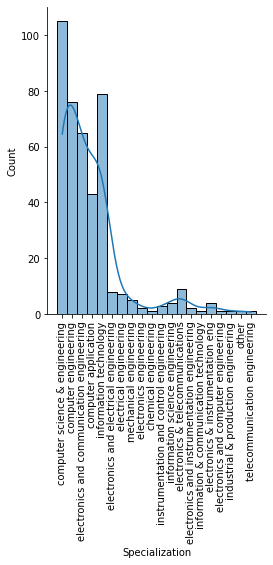

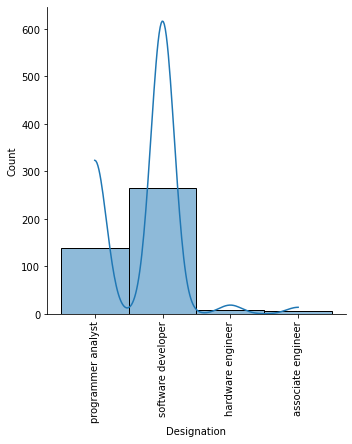

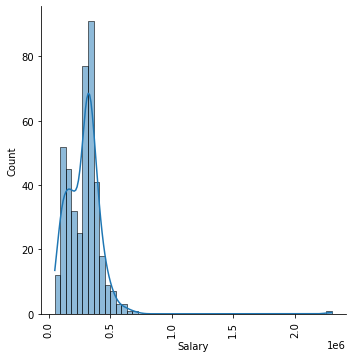

In [14]:
for feature in select_data:
    data=data.copy()
    
    sns.displot(select_data[feature], kde=True)
    plt.xticks(rotation = 'vertical')
    plt.show()

In [15]:
data['DOJ'] = pd.to_datetime(data['DOJ'])
data['DOB'] = pd.to_datetime(data['DOB'])

In [16]:
data['DOL'] = data['DOL'].replace('present', '9/1/2015 0:00')
data['DOL'] = pd.to_datetime(data['DOL'])

In [17]:
Age = data["DOL"]-data["DOB"]
Experience = data["DOL"]-data["DOJ"]
data["Experience"]=((data["DOL"]-data["DOJ"]).map(lambda x: round(x.days/365,1)))
data["Age"]=((data["DOL"]-data["DOB"]).map(lambda x: round(x.days/365,1)))
data["Experience"]=data["Experience"].astype(int)
data["Age"]=data["Age"].astype(int)

In [18]:
print(data["Experience"].unique())
print(data["Age"].unique())

[ 3  2  1  4  0  5  9  6 24  8]
[25 23 24 22 26 21 28 35 20 27 29 18 19 31 32 30]


In [19]:
# row in which value of 'salary less than certian amount
for i in range(1,8):
    seriesObj = data.apply(lambda x: True if x['Salary'] <= 250000*i  else False , axis=1)
    # Count number of True in series
    numOfRows = len(seriesObj[seriesObj == True].index)
 
    print('Number of Rows in dataframe in which Salary %d  : '%((250000*i)), numOfRows)

Number of Rows in dataframe in which Salary 250000  :  1710
Number of Rows in dataframe in which Salary 500000  :  3683
Number of Rows in dataframe in which Salary 750000  :  3929
Number of Rows in dataframe in which Salary 1000000  :  3962
Number of Rows in dataframe in which Salary 1250000  :  3975
Number of Rows in dataframe in which Salary 1500000  :  3981
Number of Rows in dataframe in which Salary 1750000  :  3982


In [20]:
indexNames = data[ data['Salary'] > 1300000 ].index
 
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)
data.shape

(3978, 39)

In [21]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Experience', 'Age'],
      dtype='object')

In [22]:
df = data[['Salary', 'Designation', 'JobCity', 'Gender',
     'Degree', 'Specialization', 'collegeGPA','GraduationYear','Experience', 'Age']]

In [23]:
df

,Salary,Designation,JobCity,Gender,Degree,Specialization,collegeGPA,GraduationYear,Experience,Age
ID,,,,,,,,,,
203097,420000.0,senior quality engineer,Bangalore,f,B.Tech/B.E.,computers science,78.00,2011,3,25
579905,500000.0,assistant manager,Indore,m,B.Tech/B.E.,electronics and communication engineering,70.06,2012,2,25
810601,325000.0,systems engineer,Chennai,f,B.Tech/B.E.,information technology,70.00,2014,1,23
267447,1100000.0,senior software engineer,Gurgaon,m,B.Tech/B.E.,computers science,74.64,2011,4,25
343523,200000.0,get,Manesar,m,B.Tech/B.E.,electronics and communication engineering,73.90,2012,1,24
...,...,...,...,...,...,...,...,...,...,...
47916,280000.0,software engineer,New Delhi,m,B.Tech/B.E.,information technology,61.50,2010,1,25
752781,100000.0,technical writer,Hyderabad,f,B.Tech/B.E.,electronics and communication engineering,77.30,2013,0,20
355888,320000.0,associate software engineer,Bangalore,m,B.Tech/B.E.,computers science,70.00,2012,2,24


In [24]:
pop_data = df[df["Experience"]==0]

In [25]:
pop_data

,Salary,Designation,JobCity,Gender,Degree,Specialization,collegeGPA,GraduationYear,Experience,Age
ID,,,,,,,,,,
947847,300000.0,java software engineer,Banglore,m,B.Tech/B.E.,computers science,72.98,2014,0,22
711342,120000.0,data entry operator,Gurgaon,m,B.Tech/B.E.,computers science,69.54,2013,0,21
990077,180000.0,electrical project engineer,Bangalore,m,B.Tech/B.E.,electronics and communication engineering,55.52,2014,0,28
810458,300000.0,ase,Bangalore,m,B.Tech/B.E.,electronics and communication engineering,76.44,2014,0,21
918981,145000.0,telecommunication engineer,Noida,m,B.Tech/B.E.,electronics and communication engineering,72.00,2015,0,21
...,...,...,...,...,...,...,...,...,...,...
1076441,315000.0,system administrator,Hyderabad,m,B.Tech/B.E.,electronics and communication engineering,68.20,2013,0,24
51897,225000.0,software test engineer,Bangalore,f,MCA,computer application,74.73,2010,0,24
466661,200000.0,data analyst,Bangalore,f,B.Tech/B.E.,information science engineering,63.20,2012,0,22


In [26]:
num_feat = [feature for feature in pop_data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(num_feat))
data[num_feat].head(2)

Number of numerical variables:  5


,Salary,collegeGPA,GraduationYear,Experience,Age
ID,,,,,
203097,420000.0,78.00,2011,3,25
579905,500000.0,70.06,2012,2,25


C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


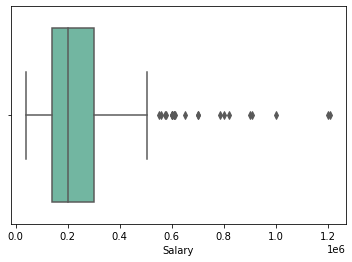

C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


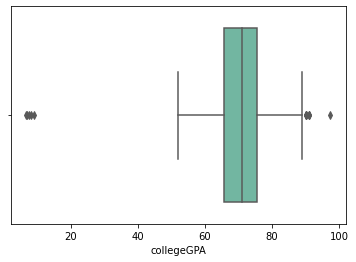

C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


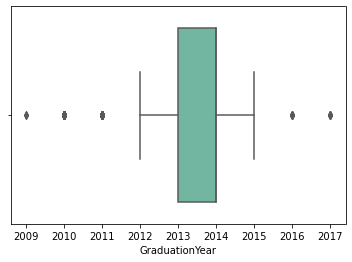

C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


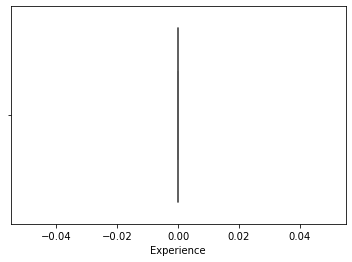

C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


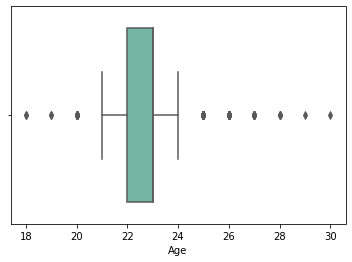

In [27]:
for feature in num_feat:
    data=data.copy()
    sns.boxplot(pop_data[feature], orient="h", palette="Set2")
    plt.show()

In [28]:
Q1 = pop_data[num_feat].quantile(0.25)
Q3 = pop_data[num_feat].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Salary            160000.0000
collegeGPA             9.6775
GraduationYear         1.0000
Experience             0.0000
Age                    1.0000
dtype: float64


In [29]:
pop_data.shape

(1306, 10)

In [33]:
pop_data = pop_data[~((pop_data < (Q1 - 1.5 * IQR)) |(pop_data > (Q3 + 1.5 * IQR))).any(axis=1)]
pop_data.shape

<ipython-input-33-c79fb79d56e7>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  pop_data = pop_data[~((pop_data < (Q1 - 1.5 * IQR)) |(pop_data > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-33-c79fb79d56e7>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  pop_data = pop_data[~((pop_data < (Q1 - 1.5 * IQR)) |(pop_data > (Q3 + 1.5 * IQR))).any(axis=1)]


(1068, 10)

C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


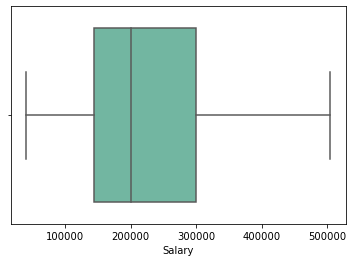

C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


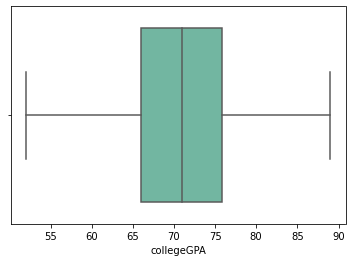

C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


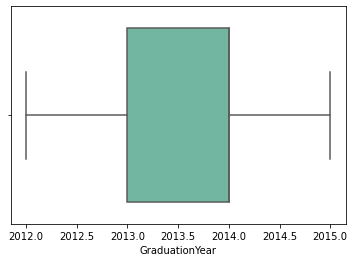

C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


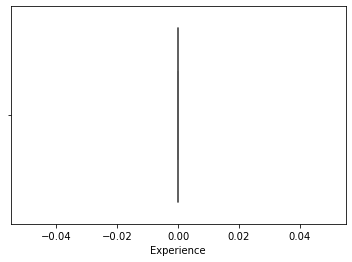

C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


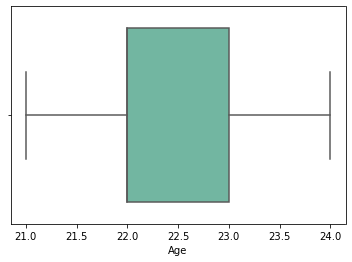

In [34]:
for feature in num_feat:
    data=data.copy()
    sns.boxplot(pop_data[feature], orient="h", palette="Set2")
    plt.show()

In [37]:
pop_data["Salary"].describe()

count      1068.000000
mean     218014.981273
std       91145.175815
min       40000.000000
25%      143750.000000
50%      200000.000000
75%      300000.000000
max      505000.000000
Name: Salary, dtype: float64

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.

In [39]:
pop_data.shape

(1068, 10)

Alternate Hypothesis (Bold Claim):$$ H_1<3 Lakh $$  
Null Hypothesis (Status Quo):$$ H_0 \geq 3 Lakh $$

In [66]:
sample_data = pop_data.sample(frac=0.60)
sample_data.shape

(641, 10)

In [68]:
sample_size = len(sample_data)
sample_size

641

In [69]:
pop_mean = pop_data["Salary"].mean()
pop_mean

218014.98127340825

In [70]:
n = 641

In [71]:
sample_mean = sample_data["Salary"].mean()
sample_mean

216466.45865834632

In [72]:
pop_std = sample_data["Salary"].std()
pop_std

93294.07075932302

In [78]:
# One Tail - Calculating the z-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha)

print(z_critical)

1.6448536269514722


Hence H1 < 3 Lakh, so it woulb be left tailed 

In [79]:
# z_score for sampling distributions

def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [80]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

-0.4202352933629301


Text(216466.45865834632, 0.0007, 'x_bar')

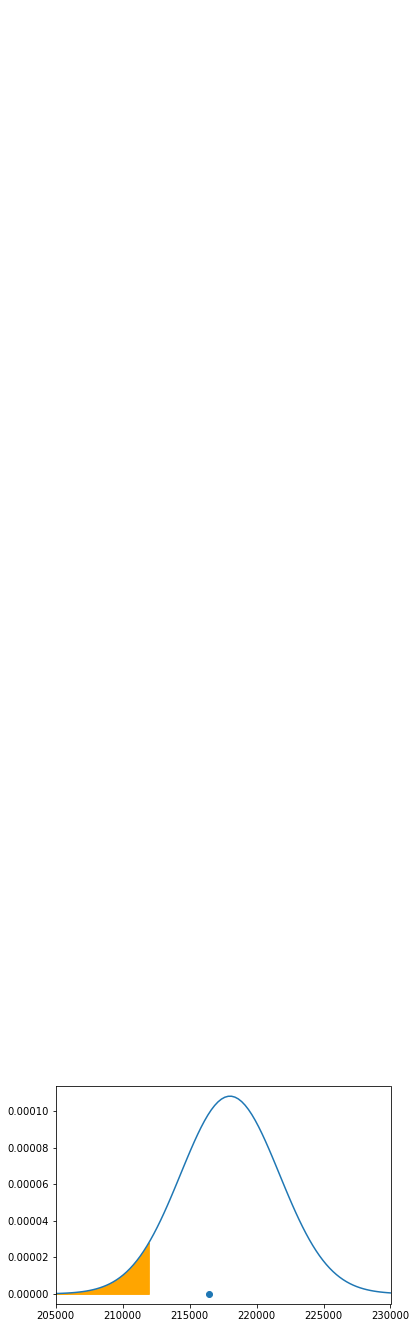

In [89]:
from scipy.stats import norm
# Ploting the sampling distribution with rejection regions
# Defining the x minimum and x maximum
x_min = 205000
x_max = 230000


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
z_critical_left = pop_mean + (-z_critical * std)



# Shading the left rejection region
x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


#

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [90]:
# Conclusion using z test

if(z > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [91]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(z))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.33715678721293374
Fail to reject Null Hypothesis
